# Power Consumption Prediction

This project uses a Bidirectional LSTM model to predict power consumption from real-world time series data.

In this notebook i will use the 'خط رقم 1' sheet from the original excel file.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Reading data and parsing the columns of date
df = pd.read_csv('line1reads.csv', parse_dates=[['date ','Time']])
df

<ipython-input-2-8f6086d5f623>:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('line1reads.csv', parse_dates=[['date ','Time']])


,date _Time,No.,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1/1/2023 0:00,1.0,200.8,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2023 0:30,2.0,180.0,137.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/1/2023 1:00,3.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/2023 1:30,4.0,156.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/1/2023 2:00,5.0,146.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18739,nan nan,17157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18740,nan nan,17158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18741,nan nan,17159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18742,nan nan,17160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
datetime = df['date _Time'] # date and time column
power = df['Unnamed: 3'] # the values of the power column

# create a new dataframe that contains wanted data
data = pd.DataFrame({
    'Datetime' : datetime,
    'Power' : power
})

data

,Datetime,Power
0,1/1/2023 0:00,200.8
1,1/1/2023 0:30,180.0
2,1/1/2023 1:00,168.0
3,1/1/2023 1:30,156.8
4,1/1/2023 2:00,146.4
...,...,...
18739,nan nan,NaN
18740,nan nan,NaN
18741,nan nan,NaN
18742,nan nan,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18744 entries, 0 to 18743
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  18744 non-null  object 
 1   Power     17252 non-null  float64
dtypes: float64(1), object(1)
memory usage: 293.0+ KB


In [ ]:
# Delete rows with null values
data = data.dropna()

In [ ]:
# asserting type of column Datetime into pandas datetime and then setting the column as index
data['Datetime'] = pd.to_datetime(data['Datetime'])
data = data.set_index(data['Datetime'])
data.info()

<ipython-input-6-9e2698de5ca5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Datetime'] = pd.to_datetime(data['Datetime'])


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17252 entries, 2023-01-01 00:00:00 to 2023-12-28 00:00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  17252 non-null  datetime64[ns]
 1   Power     17252 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 404.3 KB


In [ ]:
data = data.drop(['Datetime'], axis = 1)
data

,Power
Datetime,
2023-01-01 00:00:00,200.8
2023-01-01 00:30:00,180.0
2023-01-01 01:00:00,168.0
2023-01-01 01:30:00,156.8
2023-01-01 02:00:00,146.4
...,...
2023-12-27 22:00:00,182.4
2023-12-27 22:30:00,169.6
2023-12-27 23:00:00,159.2


<Axes: xlabel='Datetime'>

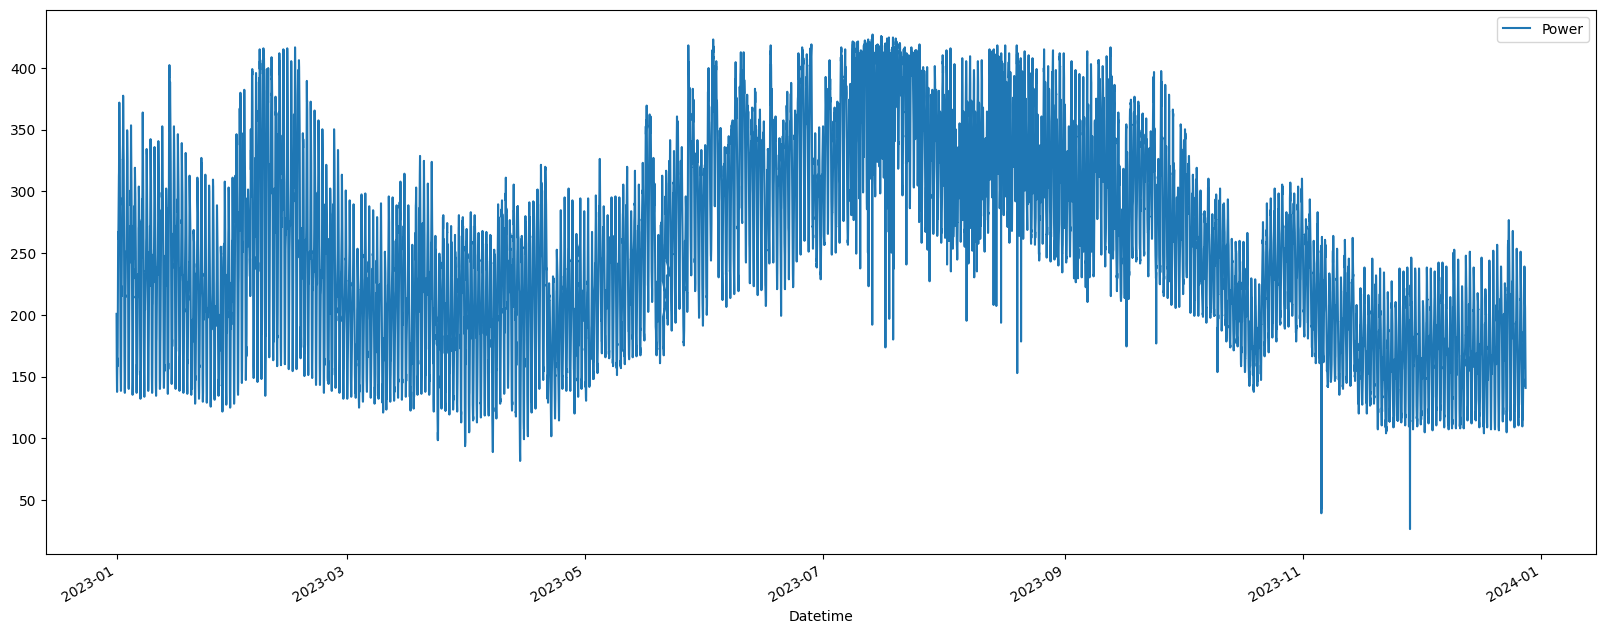

In [ ]:
data.plot(figsize=(20,8))

- The outlaying values, which is values less than 50, as shown in plot, must be treated, we can set them to null and then deal with them as null values

In [ ]:
data.loc[data['Power'] < 50, 'Power'] = np.nan

### Dealing with null values
As we are dealing with time series data, its important to interpolate null values not to delete them.

Because i droped null values using `dropna` method, all rows with null values have been droped, i need to insert the droped dates and then interpolate thier power values.

To do that i well generate a list of all dates and times ranging from `2023-01-01 00:00:00` to `2023-12-28 00:00:00`. and merge it with the data datafram on the Datetime column, left join. After that we can interpolate the null values.


In [ ]:
half_hourly = pd.date_range(start="2023-01-01 00:00", end="2023-12-28 00:00", freq='30min')

data2 = pd.DataFrame({
    'Datetime' : half_hourly
})

In [ ]:
merged_df = pd.merge(data2, data, on='Datetime', how='left')
merged_df

,Datetime,Power
0,2023-01-01 00:00:00,200.8
1,2023-01-01 00:30:00,180.0
2,2023-01-01 01:00:00,168.0
3,2023-01-01 01:30:00,156.8
4,2023-01-01 02:00:00,146.4
...,...,...
17325,2023-12-27 22:00:00,182.4
17326,2023-12-27 22:30:00,169.6
17327,2023-12-27 23:00:00,159.2
17328,2023-12-27 23:30:00,148.8


In [ ]:
merged_df[merged_df['Power'].isnull()]

,Datetime,Power
1090,2023-01-23 17:00:00,NaN
1091,2023-01-23 17:30:00,NaN
1618,2023-02-03 17:00:00,NaN
1619,2023-02-03 17:30:00,NaN
1620,2023-02-03 18:00:00,NaN
...,...,...
15905,2023-11-28 08:00:00,NaN
15906,2023-11-28 08:30:00,NaN
15907,2023-11-28 09:00:00,NaN
16967,2023-12-20 11:00:00,NaN


In [ ]:
# setting the datetime as index to do the interpolation
merged_df = merged_df.set_index('Datetime')
#merged_df = merged_df.drop('Datetime', axis = 1)
merged_df

,Power
Datetime,
2023-01-01 00:00:00,200.8
2023-01-01 00:30:00,180.0
2023-01-01 01:00:00,168.0
2023-01-01 01:30:00,156.8
2023-01-01 02:00:00,146.4
...,...
2023-12-27 22:00:00,182.4
2023-12-27 22:30:00,169.6
2023-12-27 23:00:00,159.2


In [ ]:
merged_df['Power'] = merged_df['Power'].interpolate(method='time')

In [ ]:
merged_df[merged_df['Power'].isnull()].sum()

,0
Power,0.0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17330 entries, 2023-01-01 00:00:00 to 2023-12-28 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Power   17330 non-null  float64
dtypes: float64(1)
memory usage: 270.8 KB


In [ ]:
merged_df.describe()

,Power
count,17330.000000
mean,255.220012
std,79.481726
min,81.600000
25%,193.600000
50%,251.200000
75%,314.400000
max,427.200000


<Axes: xlabel='Datetime'>

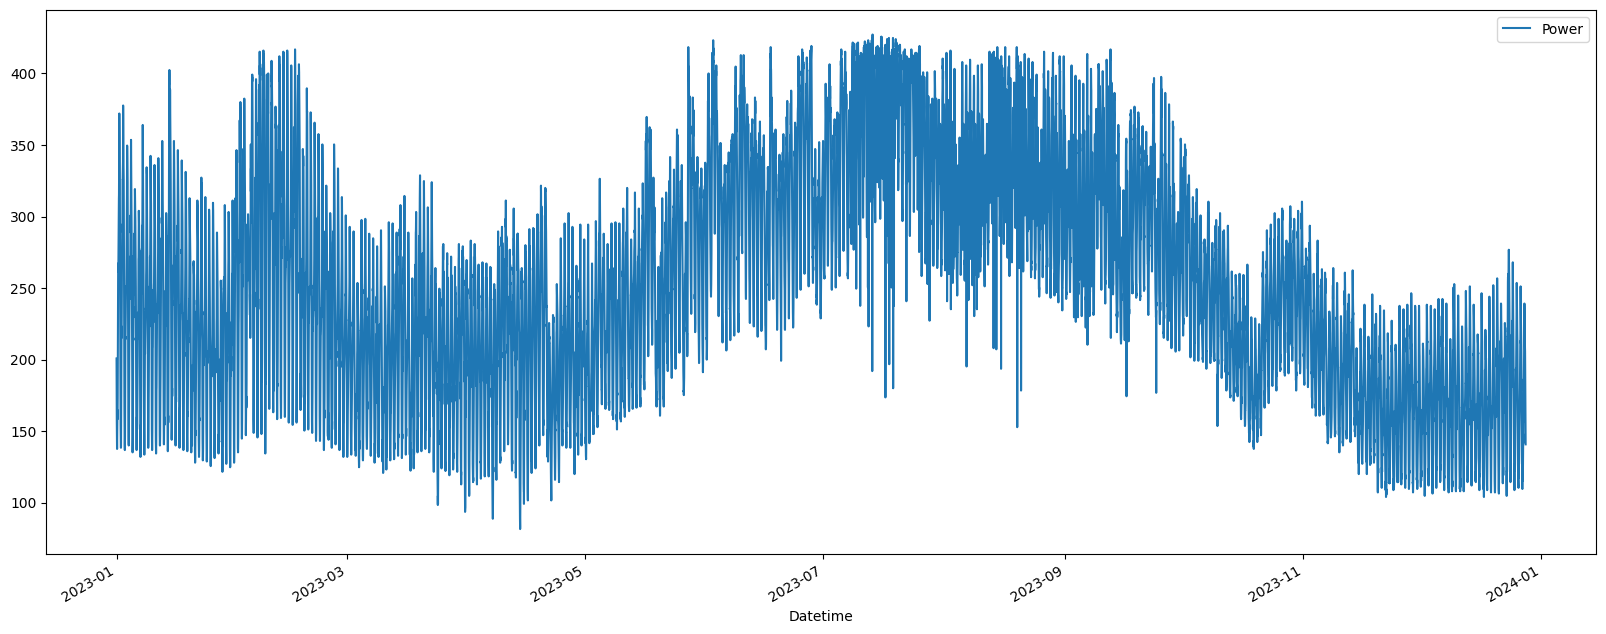

In [ ]:
merged_df.plot(figsize=(20,8))

<Axes: xlabel='Datetime'>

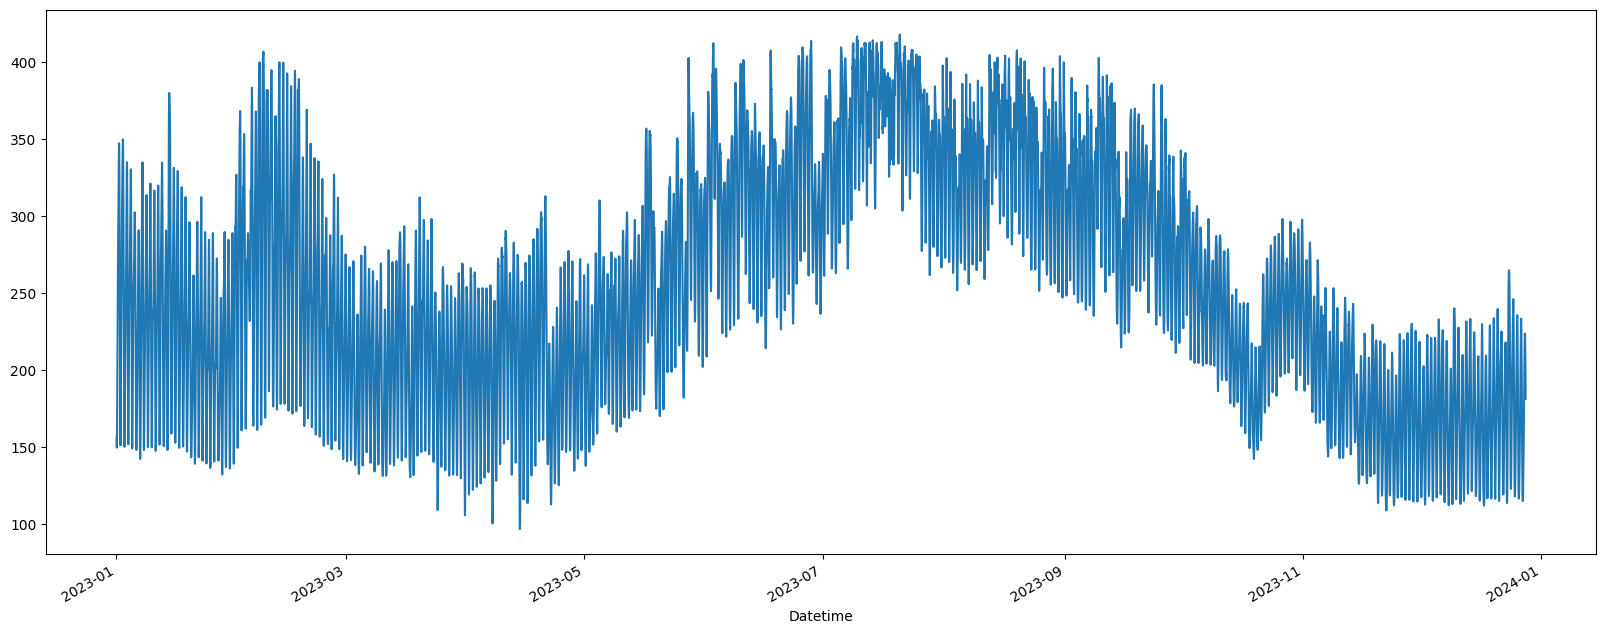

In [ ]:
merged_df['Power'].rolling(window=10).mean().plot(figsize=(20,8))

<Axes: xlabel='Datetime'>

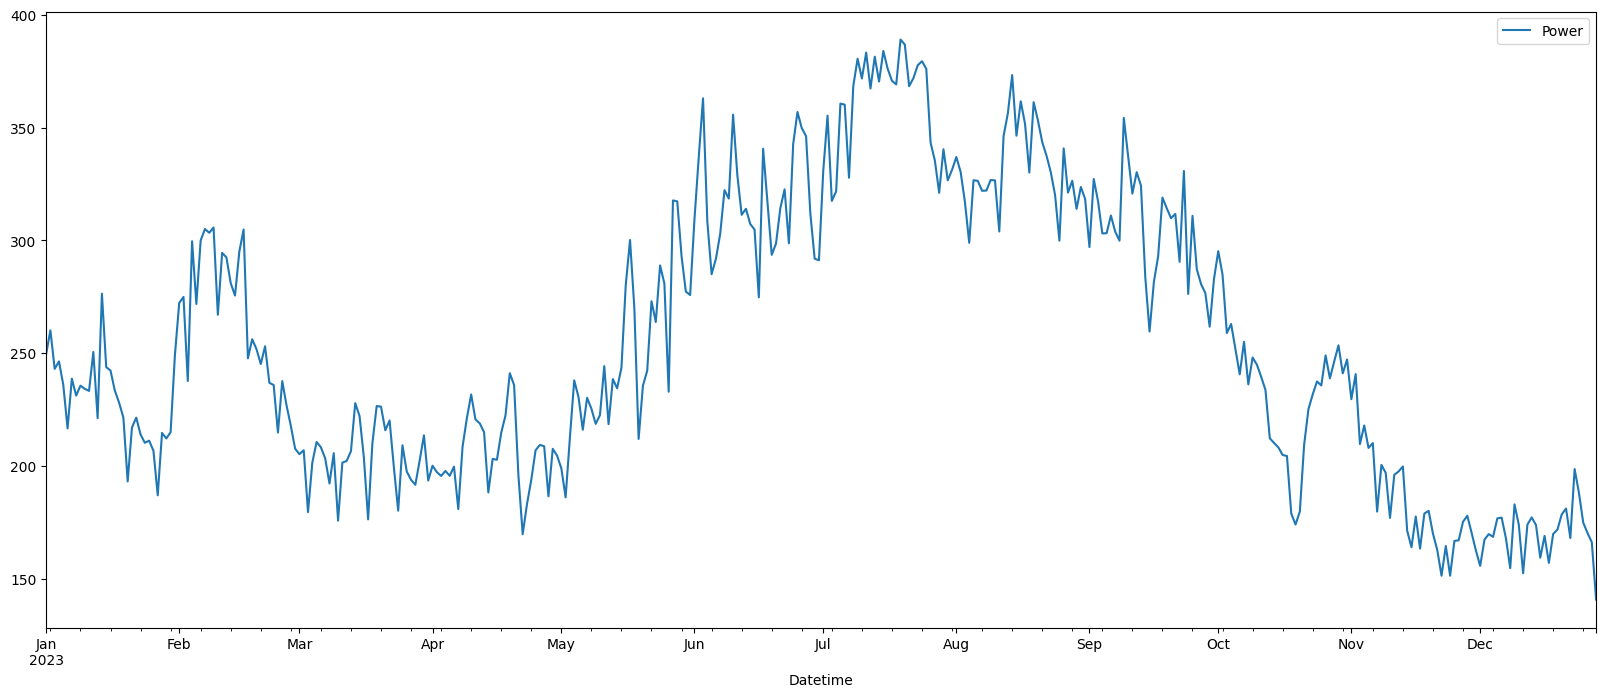

In [ ]:
merged_df.resample('D').mean().plot(figsize=(20,8))

<ipython-input-21-5e9b5c80b4d3>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  merged_df.resample('M').mean().plot(figsize=(20,8))


<Axes: xlabel='Datetime'>

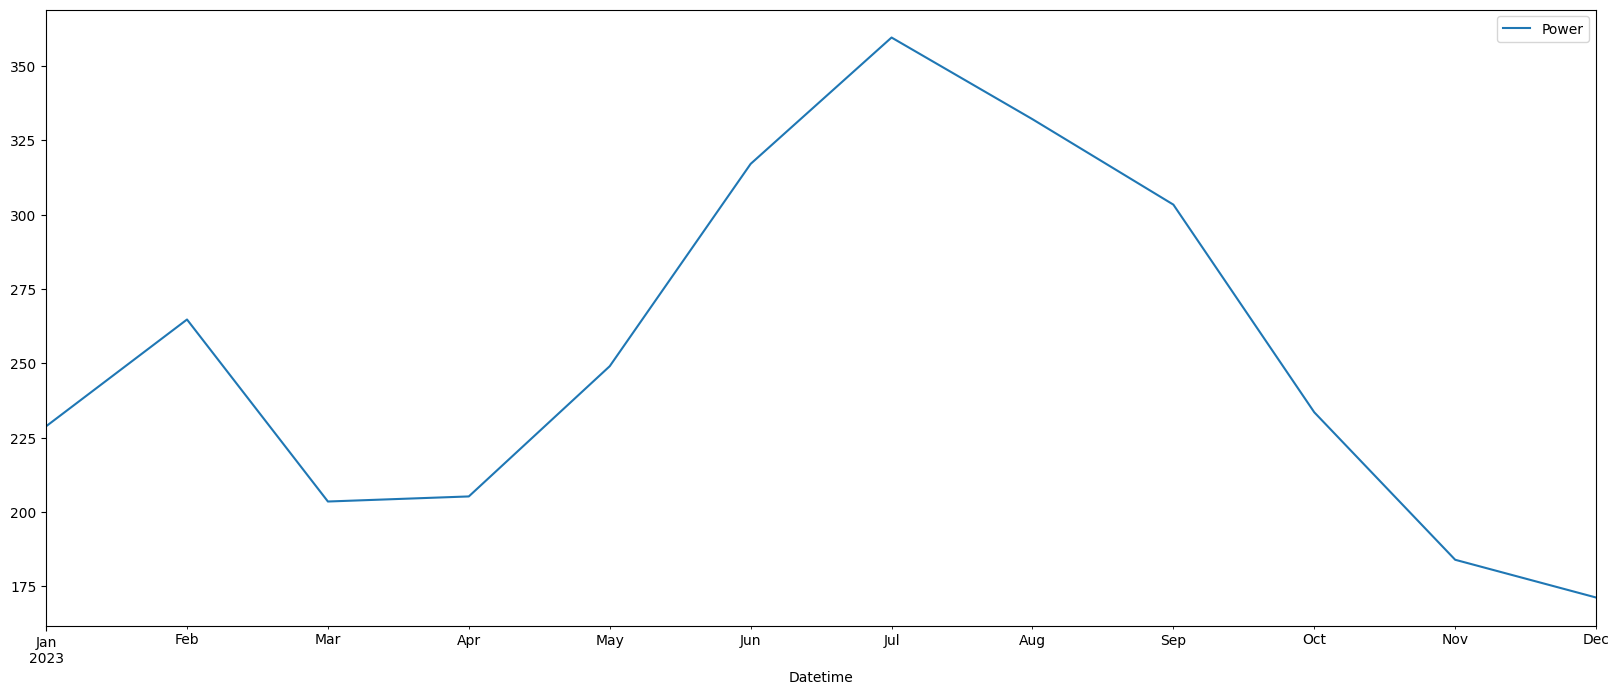

In [ ]:
merged_df.resample('M').mean().plot(figsize=(20,8))

### Data Preparation

In [ ]:
# function for creating sequences with spacific number of steps
def prep_seq(data, steps):
  X, y = [], []
  for i in range(len(data)):
    if i + steps > len(data) - 1:
      break
    X.append(data[i:i + steps])
    y.append(data[i + steps])

  return np.array(X), np.array(y)

In [ ]:
raw_data = merged_df['Power'].values
steps = 24 # setting steps into 24 --> half a day before predicting the next read
X, y = prep_seq(raw_data, steps)


In [ ]:
# splitting data into 85% train and 15% test
split_size = 0.85
split_index = int(len(X) * split_size)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (14710, 24)
X test:  (2596, 24)
y train:  (14710,)
y test:  (2596,)


In [ ]:
n_fetures = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_fetures))
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_fetures))

## Building Model

In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

model = Sequential();
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(steps, n_fetures)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
yhat = []

for i in range(len(y_test)):
  yhat.append(model.predict(X_test[i].reshape((1, steps, n_fetures)), verbose=0)[0][0])

In [ ]:
print(y_test.shape)
print(len(yhat))

(2596,)
2596


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, yhat)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, yhat)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared Score (R²)
r2 = r2_score(y_test, yhat)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 4.644629354726736
MSE: 41.0169904706616
RMSE: 6.404450832870965
R² Score: 0.9761706018393715


In [ ]:
def calc_acc(list1, list2):
    y_true = np.array(list1)
    y_pred = np.array(list2)

    mape = np.mean(np.abs(abs(y_true - y_pred) / y_true)) * 100

    accuracy_percentage = 100 - mape

    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("Accuracy Percentage:", accuracy_percentage)


print(calc_acc(y_test,yhat))

Mean Absolute Percentage Error (MAPE): 2.675372688541651
Accuracy Percentage: 97.32462731145834
None


In [ ]:
dataf = pd.DataFrame({
    'True' : y_test,
    'Predicted' : yhat
})

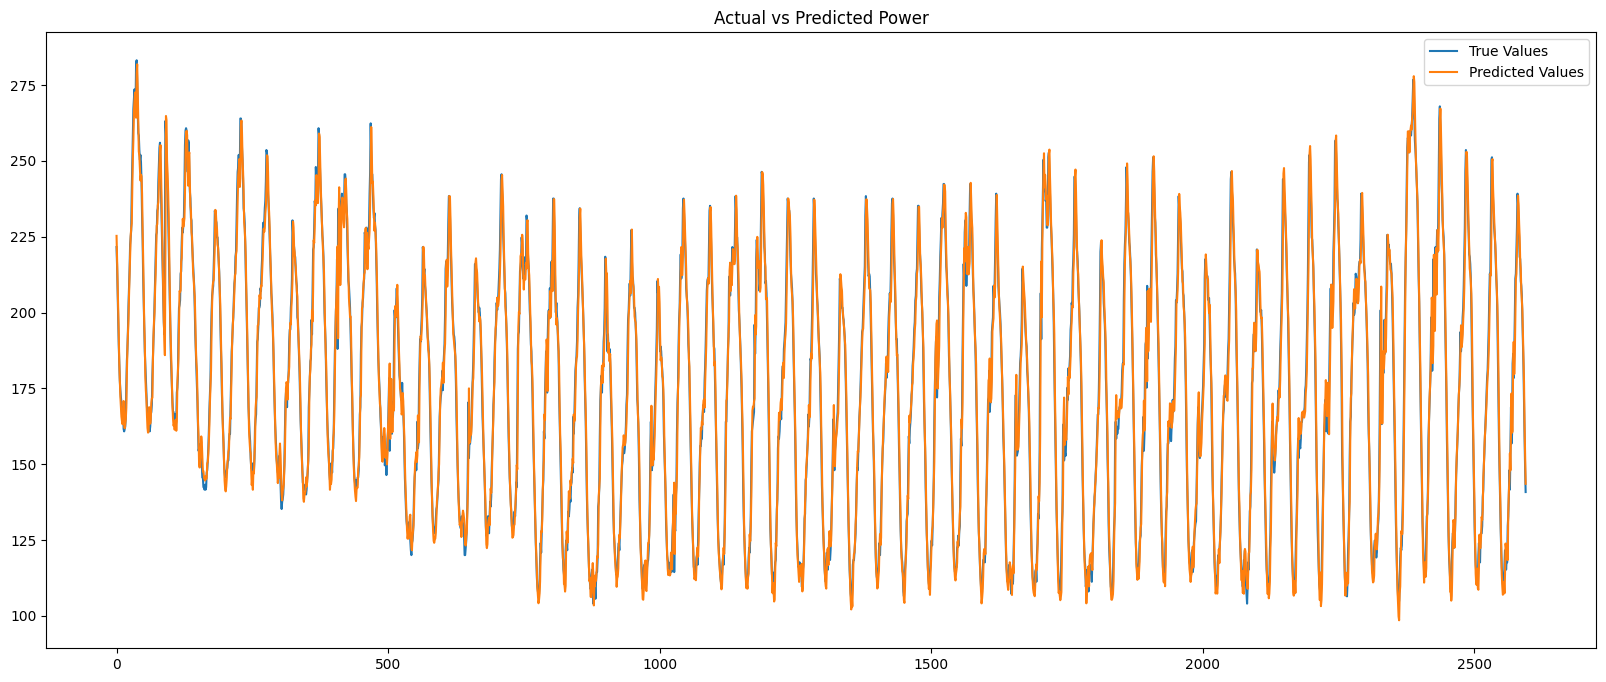

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(dataf.index, dataf['True'], label='True Values')
plt.plot(dataf.index, dataf['Predicted'], label='Predicted Values')
plt.legend()
plt.title("Actual vs Predicted Power")
plt.show()